In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_importance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import recall_score

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("/home/hybrid/unbalaced_20_80_dataset.csv",index_col=0,low_memory=False)
train.size

639786756

In [72]:
train.shape

(7616509, 84)

In [53]:
from sklearn import preprocessing 
for f in train.columns: 
    if train[f].dtype=='object': 
        label = preprocessing.LabelEncoder() 
        label.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))
train.fillna((-999), inplace=True) 
train=np.array(train) 
train = train.astype(float) 

In [54]:
Y = train['Label']
X = train.drop("Label",axis=1)

In [55]:
print(train.shape)
print(X.shape)
print(Y.shape)

(7616509, 84)
(7616509, 83)
(7616509,)


In [56]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [69]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5103061, 83)
(5103061,)
(2513448, 83)
(2513448,)


In [58]:
%%time
#from sklearn.neighbors import KNeighborsClassifier
model=BernoulliNB(binarize=0.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


CPU times: user 14.7 s, sys: 7.02 s, total: 21.8 s
Wall time: 17.5 s


In [70]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)
f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
rs=recall_score(y_test,y_pred)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.9207666122394416
f1-acore: 0.8045433711751305
confusion matrix:
 [[1904428  181936]
 [  17213  409871]]
Precision: 0.6925754511183545
Recall_score: 0.959696453156756
Misclassified : 199149


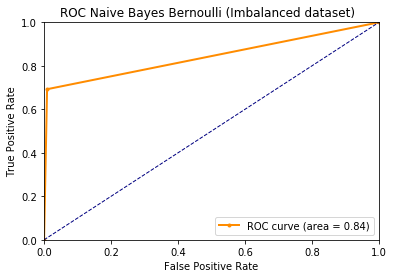

In [67]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc, marker='.')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Naive Bayes Bernoulli (Imbalanced dataset)  ')
plt.legend(loc="lower right")
plt.show()


In [ ]:
%%time
from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
modelg=GaussianNB()
modelg.fit(X_train, y_train)
y_predg = modelg.predict(X_test)


In [63]:
y_pred=y_predg
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)

f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)

cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.9207666122394416
f1-acore: 0.8045433711751305
confusion matrix: [[1904428  181936]
 [  17213  409871]]
Precision: 0.6925754511183545
Misclassified : 199149


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc, marker='.')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()


In [73]:
%%time
from sklearn.naive_bayes import MultinomialNB
modelg=MultinomialNB()
modelg.fit(X_train, y_train)
y_predg = modelg.predict(X_test)

ValueError: Input X must be non-negative

In [38]:
y_pred=y_predm
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)

f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)

cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.9207666122394416
f1-acore: 0.8045433711751305
confusion matrix: [[1904428  181936]
 [  17213  409871]]
Precision: 0.6925754511183545
Misclassified : 199149
